# Introduction
In our project, we will be investigating which neighborhood is the best in terms of police incidents, police arrests, and fire incidents. We will be proving the best one based off of what we consider a "disaster frequency". This metric is testing how many police encounters and fire incidents are happening in a specific neighborhood. Disaster frequency was determined as a way to calculate how many negatively connotated incidents occurred in a region, giving us plausible reasoning to call neighborhoods more or less safe. This project compared neighborhoods to figure out which one is deemed the safest by the lowest frequency of our metric. We explored other data sets such as bus routes, however they didn't fit into the question we were investigating. 

#### Police Arrests by: Mridula Kanakavelan

First I imported the data from the csv file that I fixed up and put it into a list that shows the top five highest and lowest arrest neighborhoods.

In [50]:
import pandas as pd 
import matplotlib.pyplot as plt

arrestdata = pd.read_csv("Arrests.csv")
datagroup = arrestdata.groupby('INCIDENTNEIGHBORHOOD')['Amount'].sum().sort_values(ascending=False)

#Get the top 5 neighborhoods
top_5 = datagroup.nlargest(5)

#Get the bottom 5 neighborhoods
bottom_5 = datagroup.nsmallest(5)

print("Top 5 neighborhoods:")
print(top_5)

print("Bottom 5 neighborhoods:")
print(bottom_5)

Top 5 neighborhoods:
INCIDENTNEIGHBORHOOD
Central Business District    3794
South Side Flats             3190
Carrick                      2200
East Allegheny               2018
Homewood South               1945
Name: Amount, dtype: int64
Bottom 5 neighborhoods:
INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood     2
Troy Hill-Herrs Island      6
Mt. Oliver Boro            18
Central Northside          23
Regent Square              35
Name: Amount, dtype: int64


#### Next, I used bar charts to show the top ten for least and most amount of arrests. This helped keep the data succint and not confusing the disect. It also helps us choose which will eventually be the overall best neighborhood because it is unlikley that the overall best neighborhood will rank # 1 in every category.

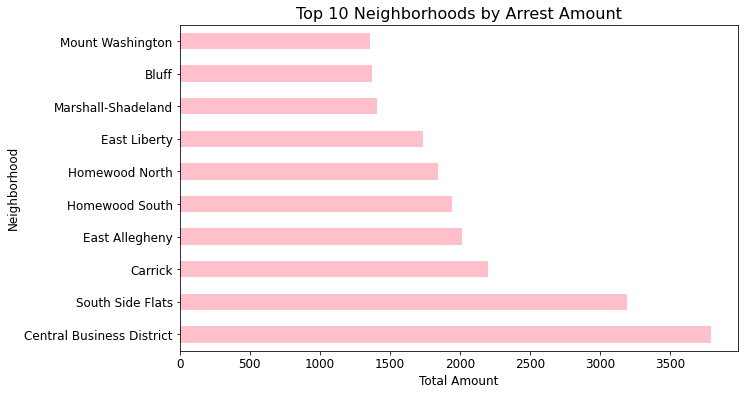

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt

arrestdata = pd.read_csv("Arrests.csv")
datagroup = arrestdata.groupby('INCIDENTNEIGHBORHOOD')['Amount'].sum().sort_values(ascending=False)

# Get the top 5 neighborhoods
top_5 = datagroup.nlargest(10)

top_5.plot.barh(figsize=(10, 6), fontsize=12, color='pink')

plt.title('Top 10 Neighborhoods by Arrest Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

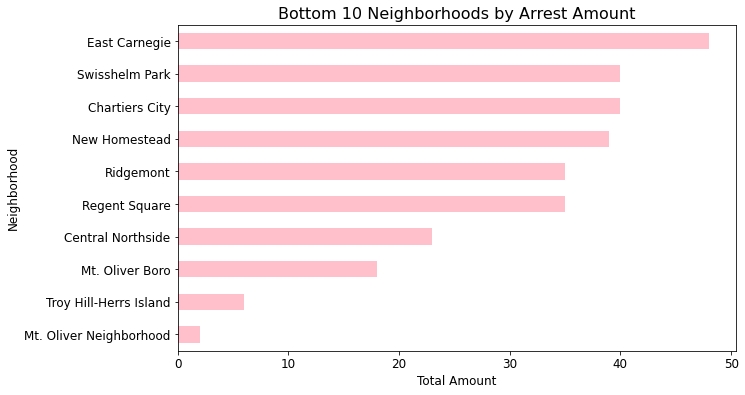

In [48]:
import pandas as pd 
import matplotlib.pyplot as plt

arrestdata = pd.read_csv("Arrests.csv")
datagroup = arrestdata.groupby('INCIDENTNEIGHBORHOOD')['Amount'].sum().sort_values(ascending=False)

# Get the bottom 5 neighborhoods
bottom_5 = datagroup.nsmallest(10)

bottom_5.plot.barh(figsize=(10, 6), fontsize=12, color='pink')

plt.title('Bottom 10 Neighborhoods by Arrest Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

## Arrests Conclusion

Based off the graph above, Mt. Oliver Neighborhood had the least amount of police arrests in Pittsburgh. Therefore, this neighborhood, in terms of solely on police arrests, is the safest. However, closely following Mt. Oliver, there are multiple neighborhoods that have very similar arrest counts. On the contrary, this graph clearly depicts that the Central Business District had the largest amount of police arrests, making it the least safe neighborhood in the data set.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

firepd = pd.read_csv("FireAlarmData.csv")
alarmgroup = firepd.groupby('neighborhood')['alarms'].sum().sort_values
alarmgroup.plot.barh(subplots=True, figsize=(100,200), fontsize=60, color='orange')
plt.xlabel('Neighborhoods', fontsize=80)
plt.ylabel('Alarm Count', fontsize=80)
plt.title("Total Fire Alarms Set Off By Neighborhood", fontsize=100)

AttributeError: 'function' object has no attribute 'plot'

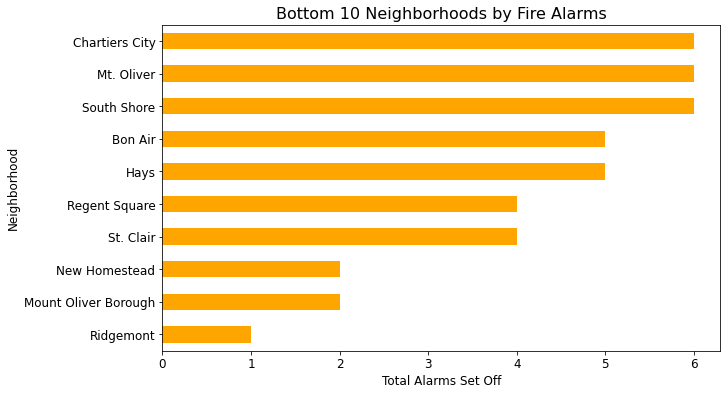

In [7]:
arrestdata = pd.read_csv("Arrests.csv")
alarmgroup = firepd.groupby('neighborhood')['alarms'].sum().sort_values(ascending=False)

# Get the bottom 5 neighborhoods
bottom_5 = alarmgroup.nsmallest(10)

bottom_5.plot.barh(figsize=(10, 6), fontsize=12, color='orange')

plt.title('Bottom 10 Neighborhoods by Fire Alarms', fontsize=16)
plt.xlabel('Total Alarms Set Off', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

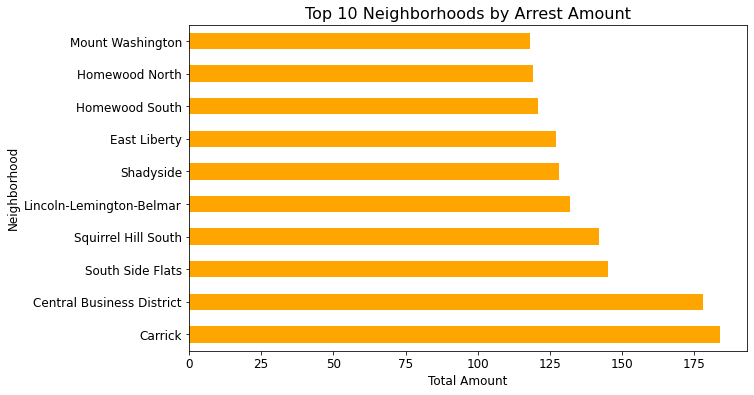

In [8]:
top_5 = alarmgroup.nlargest(10)

top_5.plot.barh(figsize=(10, 6), fontsize=12, color='orange')

plt.title('Top 10 Neighborhoods by Arrest Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

## Brandon's Conclusion

Based on the data results, I've concluded that Ridgemont is the neighborhood with the lowest risk of catching fire with New Homestead and Mount Oliver Borough coming in second. Compared to the results of the other datasets, these 3 neighborhoods can be considered the safest neighborhoods for long term residency.

## Comparison of Neighborhoods Based Upon Police Incident Reports
    Using data provided by the City of Pittsburgh, we are able to analyze each individual neighborhood by various crime statistics. In specific, I will be looking at the reports of police incidents, circumstances where police arrive at a scene due to a crime report, but do not inherently arrest anyone. The bar graph below utlizes a .CSV file sorted into a bar graph, wherein the different neighborhoods of Pittsburgh are sorted alphabetically, each displayng the amount of police incidents that have occurred in the last 30 days. Usng this metric, we are able to compare the different neighborhoods in a very superficial way. Based upon the data below, we can arrive at the conclusion that, soley based upon a lack of police incidents as a metric, that **East Carnegie** is a contender for best neighboorhood, as shown on the graph below.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

incidentdata = pd.read_csv("IncidentsNeighborhoods.csv")
datagroup=incidentdata.groupby('INCIDENTNEIGHBORHOOD')['INCIDENTS'].sum()
datagroup.plot(kind='barh',figsize=(100,250), fontsize=60)
plt.title("Police Incidents by Neighborhood",fontsize=200)
plt.xlabel("Number of Incidents",fontsize=100)
plt.ylabel("Neighborhood",fontsize=100)
plt.show()

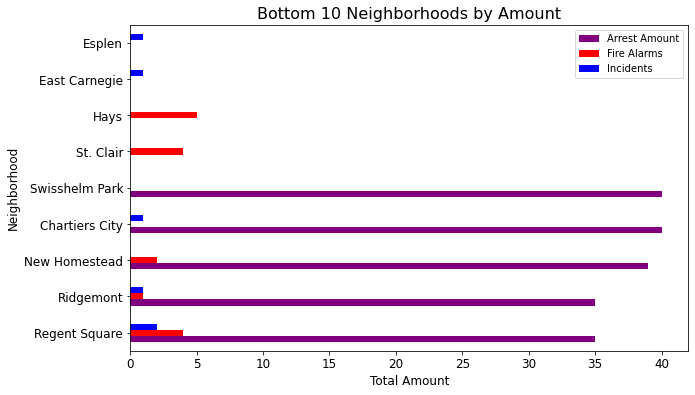

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt

arrestdata = pd.read_csv("Arrests.csv")
incidentdata = pd.read_csv("IncidentsNeighborhoods.csv")
firepd = pd.read_csv("FireAlarmData.csv")

#Intersection
neighborhoods = set(arrestdata['INCIDENTNEIGHBORHOOD']).intersection(set(incidentdata['INCIDENTNEIGHBORHOOD'])).intersection(set(firepd['neighborhood']))

arrestdata_filtered = arrestdata[arrestdata['INCIDENTNEIGHBORHOOD'].isin(neighborhoods)]
incidentdata_filtered = incidentdata[incidentdata['INCIDENTNEIGHBORHOOD'].isin(neighborhoods)]
firepd_filtered = firepd[firepd['neighborhood'].isin(neighborhoods)]

datagroup0 = arrestdata_filtered.groupby('INCIDENTNEIGHBORHOOD')['Amount'].sum().sort_values()
datagroup1 = firepd_filtered.groupby('neighborhood')['alarms'].sum().sort_values()
datagroup2 = incidentdata_filtered.groupby('INCIDENTNEIGHBORHOOD')['INCIDENTS'].sum().sort_values()

#Lowest neighborhoods based on the sum of INCIDENTS column
lowest_incidents = datagroup2.nsmallest(5)
lowest_fire = datagroup1.nsmallest(5)
lowest_arrest = datagroup0.nsmallest(5)

#Combine the data into a single dataframe
combined_data = pd.concat([lowest_arrest, lowest_fire, lowest_incidents], axis=1)
combined_data.columns = ['Arrest Amount', 'Fire Alarms', 'Incidents']
combined_data = combined_data.fillna(0)

colors = ['purple', 'red', 'blue']

#Create the bar chart with bars next to each other
combined_data.plot.barh(figsize=(10, 6), fontsize=12, color=colors)

plt.title('Bottom 10 Neighborhoods by Amount', fontsize=16)
plt.xlabel('Total Amount', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

plt.show()

# The Best Neighborhood

Safety was how we chose to rank the "best-ness" of the neighborhoods. The overall best neighborhood based on all three data sets is Ridgemont. Ridgemont has the lowest amount of fire incidents, and is one of the lowest on both police incidents and arrests. As you can see from this bar chart some of the lowest weighted neighborhoods were only on there for a single metric, therefore we only took into account the ones that had all three bars. This left it to just Ridgemont and Regent Square. Looking at the bar chart above, Ridgemont and Regent Square are tied for Arrests and Ridgemont beats out Regent Square in the other two categories. Our metric was looking at the safety in all of the neighorhoods using the submetrics: police incidents, arrests, and fire incidents. Although this wasn't the lowest on both the police arrests and incidents, it is a common denominator between all three data sets.  

### Explaining Our Code

First we imported pandas and matplotlib.pyplot

Read in the csv files

Group our metrics

Sum up the numerical metrics

Sorted them in ascending order 

Make the bar graph using the top and bottom of the data sets

Change fontsize and add labels